<a href="https://colab.research.google.com/github/spranav1998/Nifty_Forecasting_LSTM/blob/main/Nifty_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import callbacks
import seaborn as sns  # Data visualization
from sklearn import metrics  # Model evaluation
from sklearn.preprocessing import MinMaxScaler

In [7]:
nifty_folder = '/content/drive/MyDrive/Colab Notebooks/Colab_Datasets/Nifty/'

In [8]:
Nifty_Main_Data = '/content/drive/MyDrive/Colab Notebooks/Colab_Datasets/Nifty/NIfty Close main.xlsx'

In [9]:
df = pd.read_excel(Nifty_Main_Data)

In [10]:
df.head()

,Date,Sl. No.,Close
0,2017-01-02,1,8179.50
1,2017-01-03,2,8192.25
2,2017-01-04,3,8190.50
3,2017-01-05,4,8273.80
4,2017-01-06,5,8243.80


In [11]:
dataset = np.array(df['Close'])

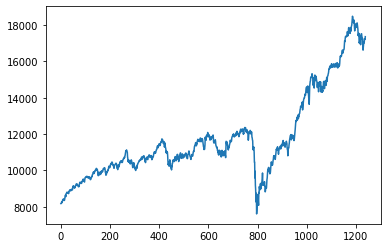

In [12]:
dataset.reshape(1,-1)
plt.plot(dataset)

In [13]:
scaler = MinMaxScaler()
dataset = np.array(df['Close'])
dataset = dataset.reshape(-1,1)
dataset = scaler.fit_transform(dataset)

In [14]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train=dataset[:train_size,:]
test=dataset[train_size:1240,:]
def getdata(data,lookback):
    X,Y=[],[]
    for i in range(len(data)-lookback-1):
        X.append(data[i:i+lookback,0])
        Y.append(data[i+lookback,0])
    return np.array(X),np.array(Y).reshape(-1,1)
lookback=1
X_train,y1_train=getdata(train,lookback)
X_test,y1_test=getdata(test,lookback)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [15]:
model=Sequential()
model.add(LSTM(1000,input_shape=(lookback,1),return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(10))
model.add(Dense(1))
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error',optimizer=opt)

In [16]:
stop_early = callbacks.EarlyStopping(
    monitor='loss', patience=5)
checkpoint = callbacks.ModelCheckpoint(
    'Nifty_Best_Model.hdf5',
    verbose=1,
    save_best_only=True,
    monitor='loss')

In [17]:
model.fit(X_train,y1_train, epochs=100,callbacks=[stop_early, checkpoint], batch_size=1)

Epoch 1/100
988/989 [============================>.] - ETA: 0s - loss: 0.0019
Epoch 1: loss improved from inf to 0.00190, saving model to Nifty_Best_Model.hdf5
989/989 [==============================] - 43s 36ms/step - loss: 0.0019
Epoch 2/100
989/989 [==============================] - ETA: 0s - loss: 2.3888e-04
Epoch 2: loss improved from 0.00190 to 0.00024, saving model to Nifty_Best_Model.hdf5
989/989 [==============================] - 34s 35ms/step - loss: 2.3888e-04
Epoch 3/100
988/989 [============================>.] - ETA: 0s - loss: 2.6212e-04
Epoch 3: loss did not improve from 0.00024
989/989 [==============================] - 35s 35ms/step - loss: 2.6195e-04
Epoch 4/100
989/989 [==============================] - ETA: 0s - loss: 2.4449e-04
Epoch 4: loss did not improve from 0.00024
989/989 [==============================] - 34s 34ms/step - loss: 2.4449e-04
Epoch 5/100
989/989 [==============================] - ETA: 0s - loss: 2.7332e-04
Epoch 5: loss did not improve from 0.000

In [18]:
best_model = models.load_model("/content/Nifty_Best_Model.hdf5")

In [19]:
def revgetdata(data,lookback):
    Y=[]
    for i in range(len(data)-lookback-1):
        Y.append(data[i+lookback,0])
    return np.array(Y).reshape(-1,1)

In [20]:
X_test,y1_test=getdata(test,lookback)
y_pred=best_model.predict(X_test)
y1_test=scaler.inverse_transform(y1_test)

In [21]:
y_pred = revgetdata(y_pred,lookback)
y_pred=scaler.inverse_transform(y_pred)

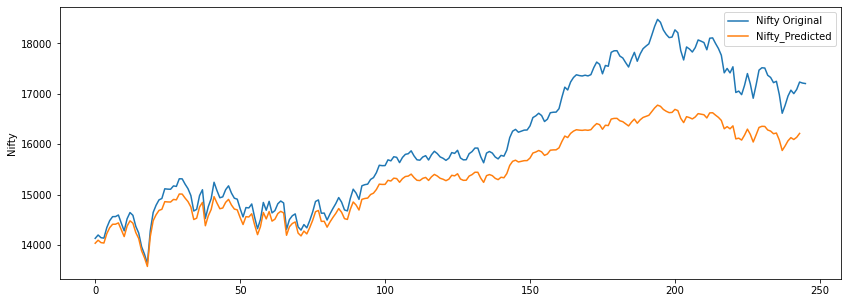

In [22]:
plt.figure(figsize=(14,5))
plt.plot(y1_test, label = 'Nifty Original')
plt.plot(y_pred, label = 'Nifty_Predicted')
plt.ylabel('Nifty')
plt.legend()
plt.show()

In [33]:
#Metrics
print("MAE:",metrics.mean_absolute_error(y1_test[:y_pred.size],y_pred),"MSE:",metrics.mean_squared_error(y1_test[:y_pred.size],y_pred),"R^2:",metrics.r2_score(y1_test[:y_pred.size],y_pred))

MAE: 613.8776863473361 MSE: 594521.9644115886 R^2: 0.6367544422601956


# Actual Testing

In [23]:
adf = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Colab_Datasets/Nifty/Nifty Close test 2022.xlsx')

In [24]:
adataset = np.array(adf['Close'])
adataset = adataset.reshape(-1,1)
adataset = scaler.fit_transform(adataset)

In [25]:
aX_test,ay1_test=getdata(adataset,lookback)
aX_test=aX_test.reshape(aX_test.shape[0],aX_test.shape[1],1)

In [26]:
ay_pred=best_model.predict(aX_test)
ay1_test=scaler.inverse_transform(ay1_test)
ay_pred = revgetdata(ay_pred,lookback)
ay_pred=scaler.inverse_transform(ay_pred)

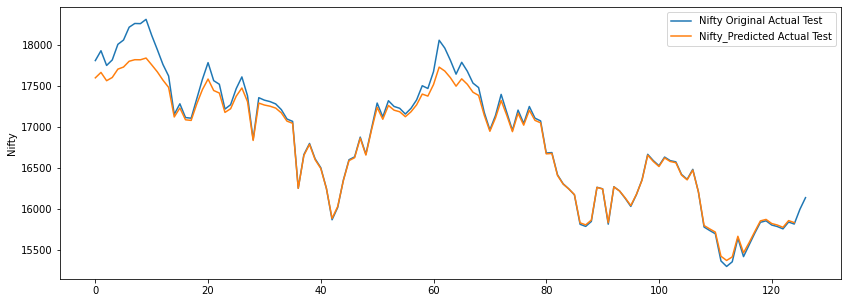

In [27]:
plt.figure(figsize=(14,5))
plt.plot(ay1_test, label = 'Nifty Original Actual Test')
plt.plot(ay_pred, label = 'Nifty_Predicted Actual Test')
plt.ylabel('Nifty')
plt.legend()
plt.show()

In [34]:
#Metrics
print("MAE:",metrics.mean_absolute_error(ay1_test[:ay_pred.size],ay_pred),"MSE:",metrics.mean_squared_error(ay1_test[:ay_pred.size],ay_pred),"R^2:",metrics.r2_score(ay1_test[:ay_pred.size],ay_pred))

MAE: 73.4525468750001 MSE: 16174.93973168945 R^2: 0.9722960617045681
